<a href="https://colab.research.google.com/github/UdithaChalla08/Oasis-Infobyte__Task3/blob/main/Oasis_Infobyte_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Mount the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **2. Importing the Dataset**

In [ ]:
df = pd.read_csv('Housing.csv')


Preview the Dataset

In [ ]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished




This dataset provides comprehensive information for **house price prediction**, containing **13 important features**:

**1. Price**  
- The selling price of the house.

**2. Area**  
- Total area of the house in square feet.

**3. Bedrooms**  
- Number of bedrooms in the house.

**4. Bathrooms**  
- Number of bathrooms available.

**5. Stories**  
- Total number of stories/floors.

**6. Mainroad**  
- Whether the house is connected to the main road (Yes/No).

**7. Guestroom**  
- Whether the house includes a guest room (Yes/No).

**8. Basement**  
- Indicates if the house has a basement (Yes/No).

**9. Hot water heating**  
- Whether a hot water heating system is available (Yes/No).

**10. Airconditioning**  
- Whether the house has an air conditioning system (Yes/No).

**11. Parking**  
- Number of parking spaces available.

**12. Prefarea**  
- Whether the house is located in a preferred area (Yes/No).

**13. Furnishing status**  
- Furnishing level of the house:
  - Fully Furnished  
  - Semi-Furnished  
  - Unfurnished  


# **3. Describe the Dataset**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Shape of the dataset

In [ ]:
df.shape


(545, 13)

Check for missing values

In [ ]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Handling missing values

In [ ]:
df = df.dropna()


# **4. Visualize the Dataset**

In [ ]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Create a Bar Graph for Relevant Features and Price


**Create the Bar Graph for Main Road and Price**

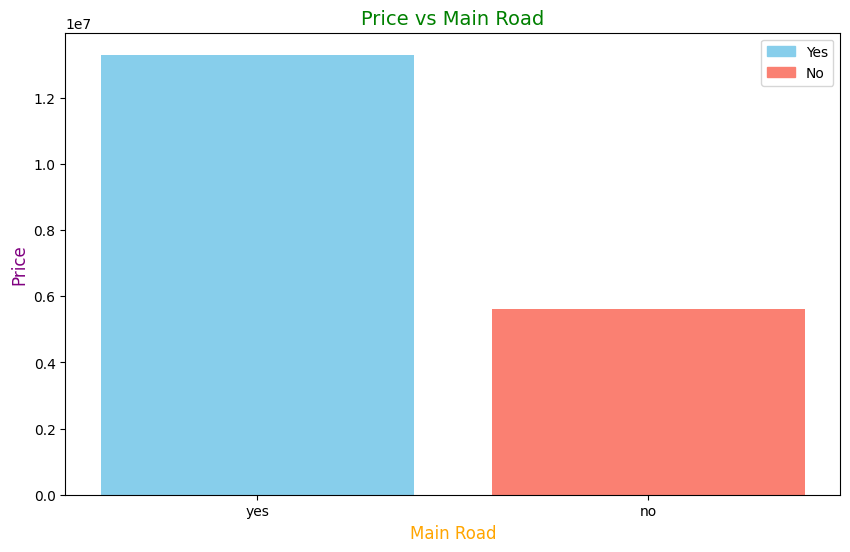

In [ ]:
# Assign colors based on mainroad values
import matplotlib.patches as mpatches
colors = df['mainroad'].map({'yes': 'skyblue', 'no': 'salmon'})

plt.figure(figsize=(10, 6))
plt.bar(df['mainroad'], df['price'], color=colors)

plt.xlabel('Main Road', fontsize=12, color='orange')
plt.ylabel('Price', fontsize=12, color='purple')
plt.title('Price vs Main Road', fontsize=14, color='green')

# Add legend
yes_patch = mpatches.Patch(color='skyblue', label='Yes')
no_patch = mpatches.Patch(color='salmon', label='No')
plt.legend(handles=[yes_patch, no_patch])

plt.show()


**Create a Bar Graph for Guestroom v/s Price**

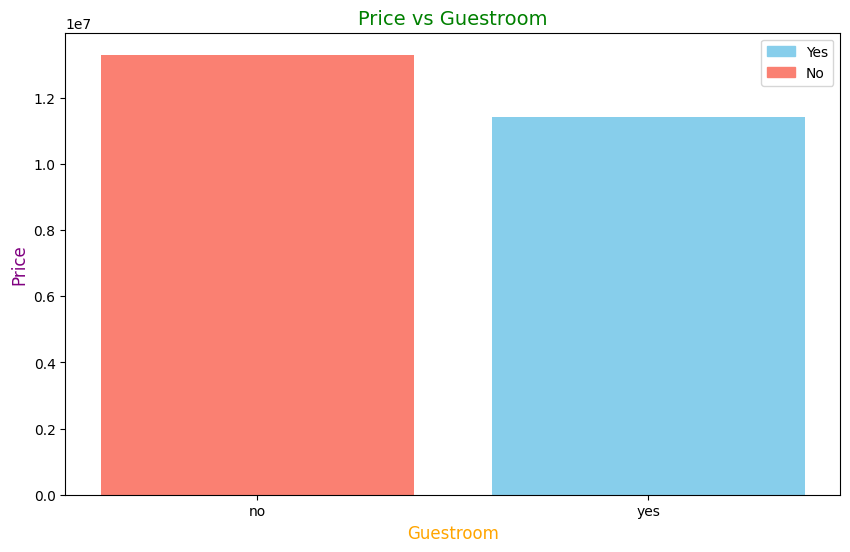

In [ ]:
# Assign colors based on guestroom values
import matplotlib.patches as mpatches
colors = df['guestroom'].map({'yes': 'skyblue', 'no': 'salmon'})

plt.figure(figsize=(10, 6))
plt.bar(df['guestroom'], df['price'], color=colors)

plt.xlabel('Guestroom', fontsize=12, color='orange')
plt.ylabel('Price', fontsize=12, color='purple')
plt.title('Price vs Guestroom', fontsize=14, color='green')

# Add legend
yes_patch = mpatches.Patch(color='skyblue', label='Yes')
no_patch = mpatches.Patch(color='salmon', label='No')
plt.legend(handles=[yes_patch, no_patch])

plt.show()


**Create a Bar Graph for Basement v/s Price**

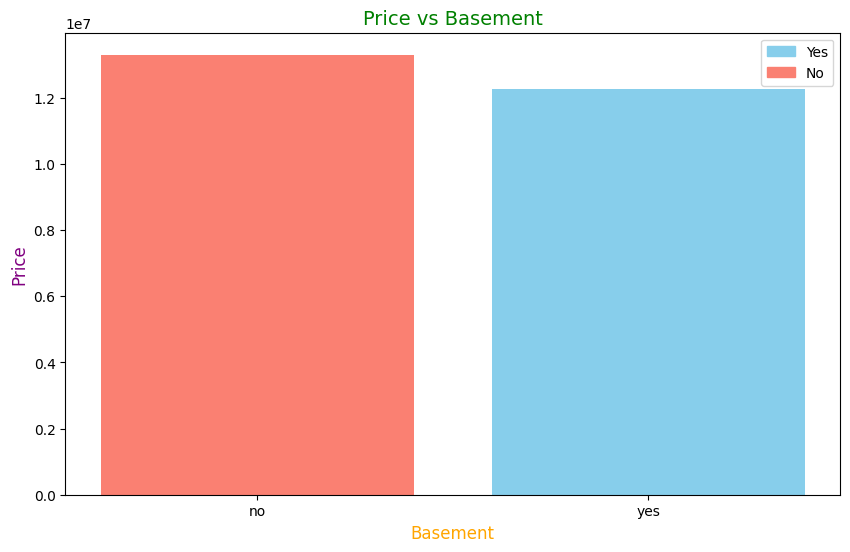

In [ ]:
colors = df['basement'].map({'yes': 'skyblue', 'no': 'salmon'})

plt.figure(figsize=(10, 6))
plt.bar(df['basement'], df['price'], color=colors)

plt.xlabel('Basement', fontsize=12, color='orange')
plt.ylabel('Price', fontsize=12, color='purple')
plt.title('Price vs Basement', fontsize=14, color='green')

# Add legend
yes_patch = mpatches.Patch(color='skyblue', label='Yes')
no_patch = mpatches.Patch(color='salmon', label='No')
plt.legend(handles=[yes_patch, no_patch])

plt.show()


**Create a Graph for Hotwaterheating v/s Price**

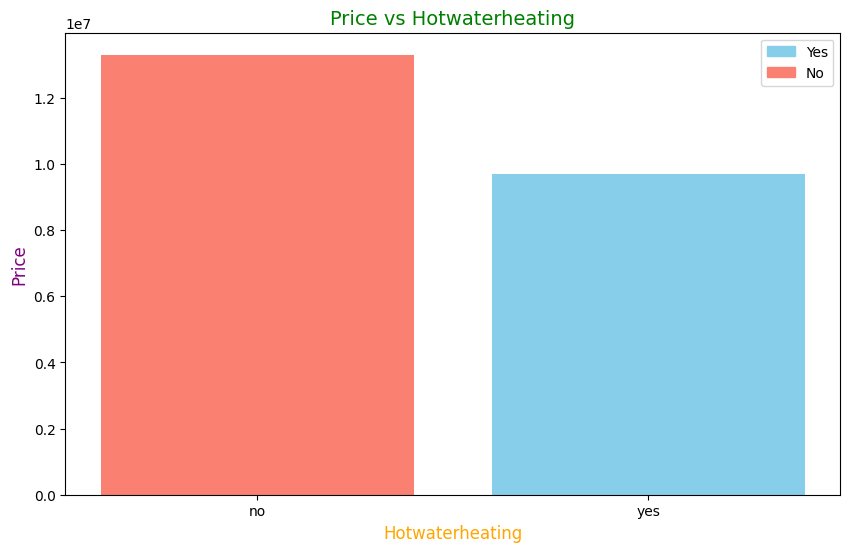

In [ ]:
# Assign colors based on hotwaterheating values
import matplotlib.patches as mpatches

colors = df['hotwaterheating'].map({'yes': 'skyblue', 'no': 'salmon'})

plt.figure(figsize=(10, 6))
plt.bar(df['hotwaterheating'], df['price'], color=colors)

plt.xlabel('Hotwaterheating', fontsize=12, color='orange')
plt.ylabel('Price', fontsize=12, color='purple')
plt.title('Price vs Hotwaterheating', fontsize=14, color='green')

# Add legend
yes_patch = mpatches.Patch(color='skyblue', label='Yes')
no_patch = mpatches.Patch(color='salmon', label='No')
plt.legend(handles=[yes_patch, no_patch])

plt.show()


**Create a Bar Graph for Airconditioning v/s Price**

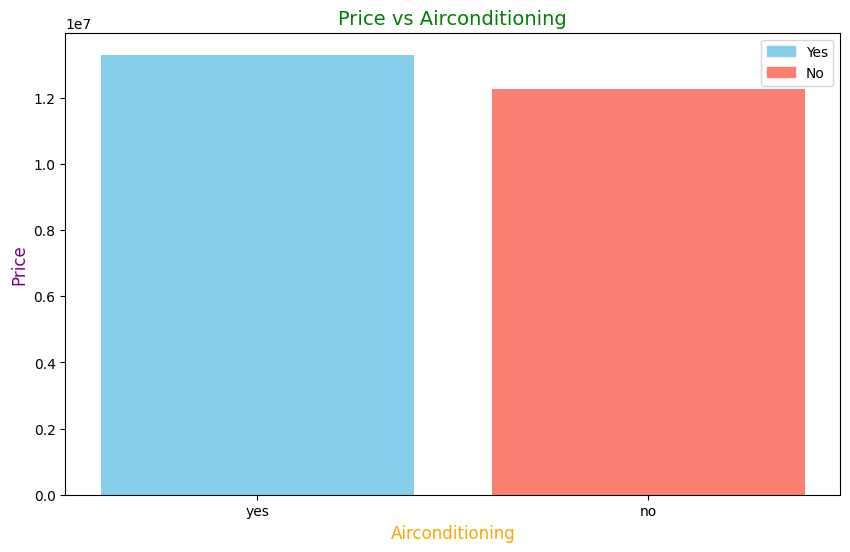

In [ ]:
colors = df['airconditioning'].map({'yes': 'skyblue', 'no': 'salmon'})

plt.figure(figsize=(10, 6))
plt.bar(df['airconditioning'], df['price'], color=colors)

plt.xlabel('Airconditioning', fontsize=12, color='orange')
plt.ylabel('Price', fontsize=12, color='purple')
plt.title('Price vs Airconditioning', fontsize=14, color='green')

# Add legend
yes_patch = mpatches.Patch(color='skyblue', label='Yes')
no_patch = mpatches.Patch(color='salmon', label='No')
plt.legend(handles=[yes_patch, no_patch])

plt.show()


**Create a Bar Graph for Prefarea v/s Price**

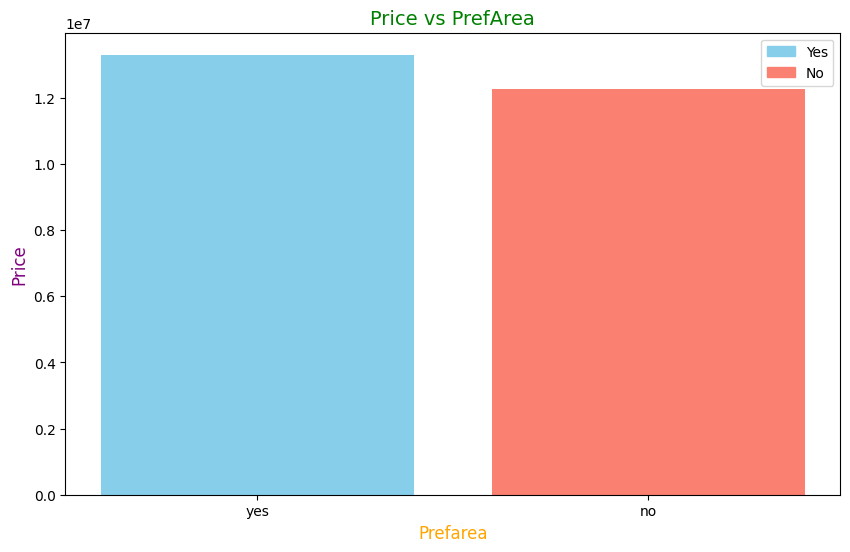

In [ ]:
colors = df['prefarea'].map({'yes': 'skyblue', 'no': 'salmon'})

plt.figure(figsize=(10, 6))
plt.bar(df['prefarea'], df['price'], color=colors)

plt.xlabel('Prefarea', fontsize=12, color='orange')
plt.ylabel('Price', fontsize=12, color='purple')
plt.title('Price vs PrefArea', fontsize=14, color='green')

# Add legend
yes_patch = mpatches.Patch(color='skyblue', label='Yes')
no_patch = mpatches.Patch(color='salmon', label='No')
plt.legend(handles=[yes_patch, no_patch])

plt.show()


**Create a Bar Graph for FurnishingStatus v/s Price**

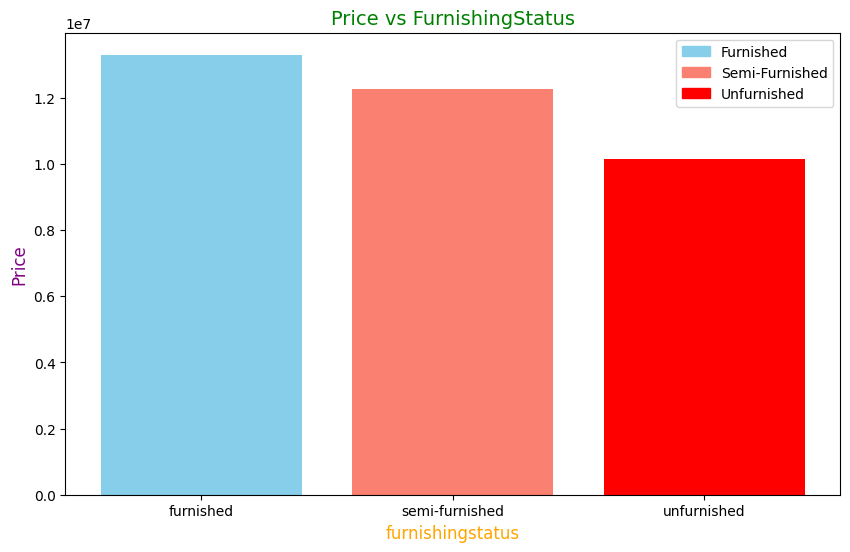

In [ ]:
colors = df['furnishingstatus'].map({
    'furnished': 'skyblue',
    'semi-furnished': 'salmon',
    'unfurnished': 'red'
})

plt.figure(figsize=(10, 6))
plt.bar(df['furnishingstatus'], df['price'], color=colors)

plt.xlabel('furnishingstatus', fontsize=12, color='orange')
plt.ylabel('Price', fontsize=12, color='purple')
plt.title('Price vs FurnishingStatus', fontsize=14, color='green')

# Define patches for legend
furnished = mpatches.Patch(color='skyblue', label='Furnished')
semi_furnished_patch = mpatches.Patch(color='salmon', label='Semi-Furnished')
unfurnished_patch = mpatches.Patch(color='red', label='Unfurnished')

# Add legend
plt.legend(handles=[furnished, semi_furnished_patch, unfurnished_patch])

# Example usage in a plot (optional)
plt.show()


# Create a Pie Chart for Yes and No Percentage Results

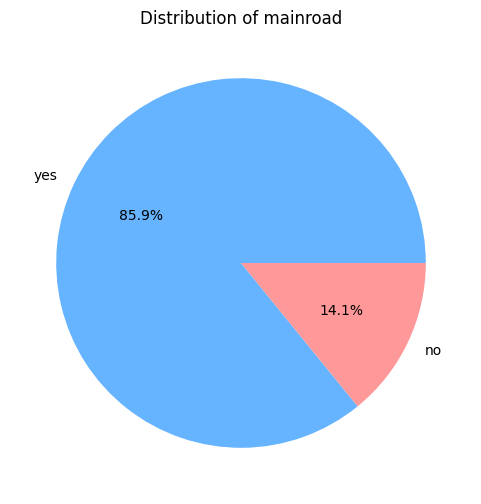

In [ ]:
# Get the value counts for the selected column
value_counts = df['mainroad'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999']
)

plt.title(f"Distribution of {'mainroad'}")
plt.show()


**Create a Pie Chart for Basement**

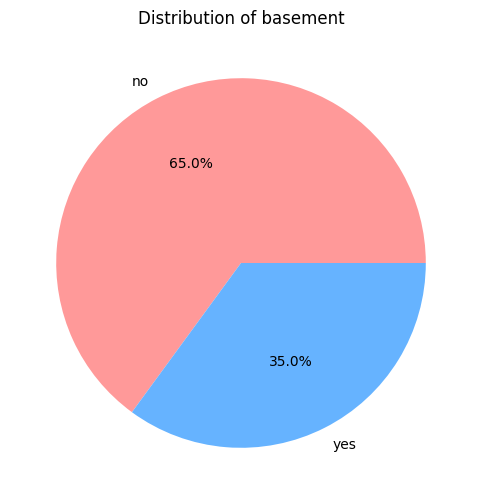

In [ ]:
# Get the value counts for the selected column
value_counts = df['basement'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff']
)

plt.title(f"Distribution of {'basement'}")
plt.show()


**Create a Pie Chart for Hotwaterheating**

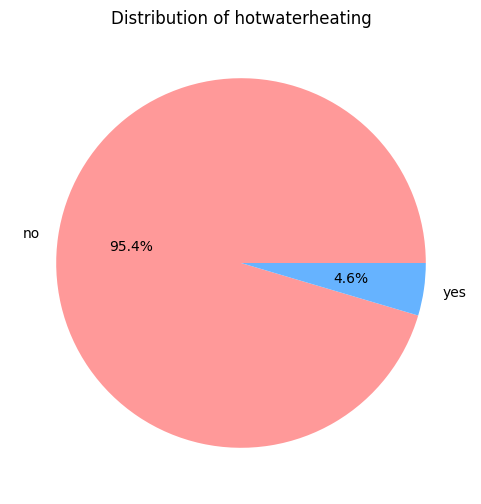

In [ ]:
# Get the value counts for the selected column
value_counts = df['hotwaterheating'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff']
)

plt.title(f"Distribution of {'hotwaterheating'}")
plt.show()


**Create a Pie Chart for Airconditioning**

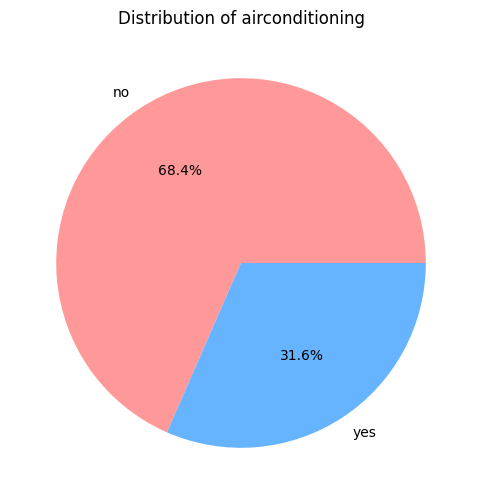

In [ ]:
# Get the value counts for the selected column
value_counts = df['airconditioning'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff']
)

plt.title(f"Distribution of {'airconditioning'}")
plt.show()


**Create a Pie Chart for Prefarea**

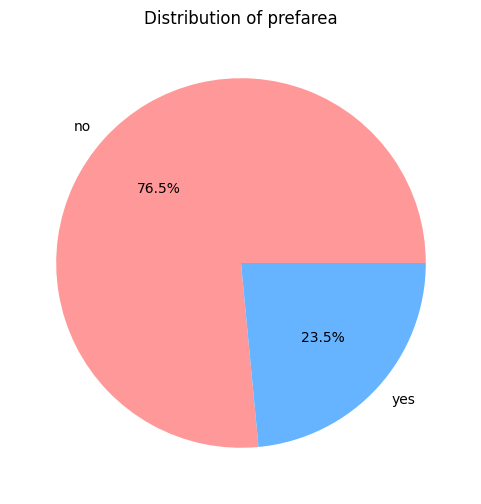

In [ ]:
# Get the value counts for the selected column
value_counts = df['prefarea'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff']
)

plt.title(f"Distribution of {'prefarea'}")
plt.show()


**Separate Pie Chart for FurnishingStatus**

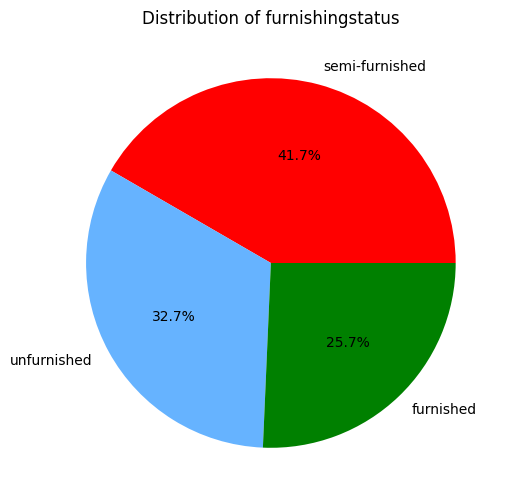

In [ ]:
# Get the value counts for the selected column
value_counts = df['furnishingstatus'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=['red', '#66b3ff', 'green']
)

plt.title(f"Distribution of {'furnishingstatus'}")
plt.show()


**Separate Pie Chart for Parking Spaces Available Within the House**

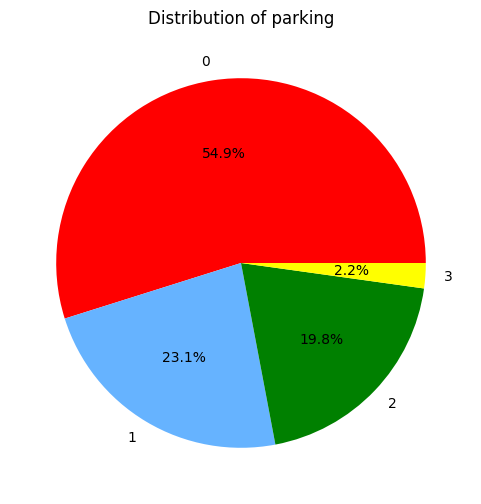

In [ ]:
# Get the value counts for the selected column
value_counts = df['parking'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=['red', '#66b3ff', 'green', 'yellow']
)

plt.title(f"Distribution of {'parking'}")
plt.show()


# Parking Legend

0 ---> No parking space within the house  
1 ---> one parking space  
2 ---> two parking spaces  
3 ---> three parking spaces  


#**5. Machine Learning Model**

**Selecting the Relevant Features of the Dataset**

In [ ]:
# Selecting relevant features (Assuming dataset contains these columns)
features = ['area', 'bedrooms', 'bathrooms', 'stories']
target = 'price'

X = df[features]
y = df[target]


**Train-test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Standard Scaler (Feature Scaling)**

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Linear Regression

**Train Linear Regression model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Predictions**

In [ ]:
y_pred = model.predict(X_test)


**Model Evaluations**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 1158970.480316688
MSE: 2457741642022.09
RMSE: 1567718.610600158
R2 Score: 0.5137585349037066


**Visualizing the Scatter Plot for Actual vs Predicted Prices (With Best Fit Line)**

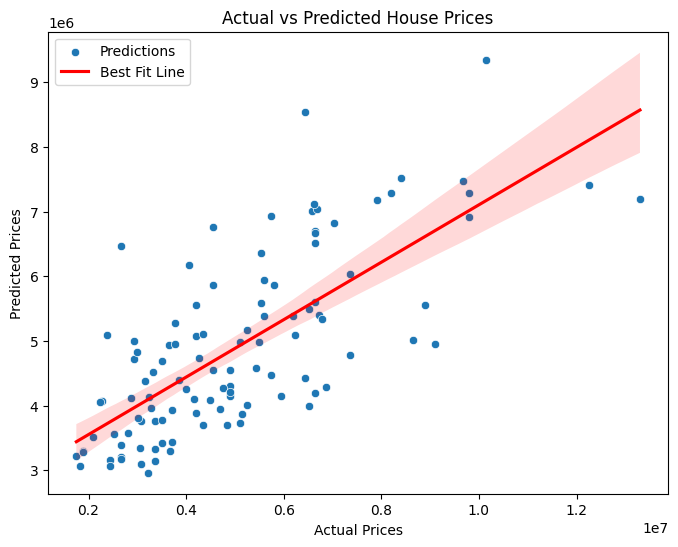

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_pred, label="Predictions")
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label="Best Fit Line")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


**Visualizing the Bar Graph for Sample Index and House Price**

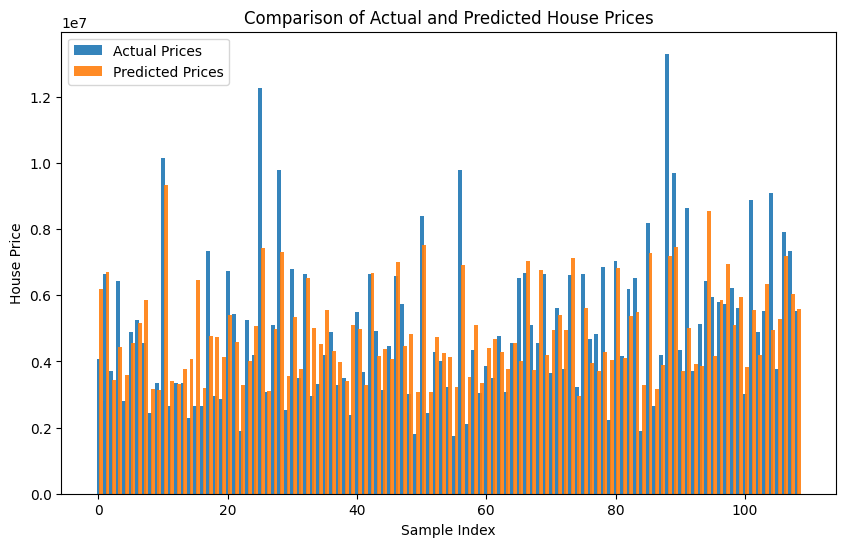

In [ ]:
plt.figure(figsize=(10, 6))

indices = np.arange(len(y_test))

plt.bar(indices, y_test.values, width=0.6, label="Actual Prices", alpha=0.9)
plt.bar(indices + 0.4, y_pred, width=0.6, label="Predicted Prices", alpha=0.9)

plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.title("Comparison of Actual and Predicted House Prices")
plt.legend()

plt.show()
